# Real Pendulum

In the equation of motion of a real pendulum we add a damping term:
\begin{equation}
    \ddot{\theta} = -\frac{g}{L} \text{sin}\theta - \beta \dot{\theta}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def deriv_rp(t, y, g, L, beta):
    '''
    Add a damping term
    '''
    return np.array([y[1], -g/L * np.sin(y[0]) - beta * y[1]])

In [3]:
def rk4(t, deriv, y, dt, **kwargs):
    for i in range(len(t)-1):
        k1 = deriv(t[i], y[i][:], **kwargs) * dt
        k2 = deriv(t[i] + dt/2, y[i][:] + k1/2, **kwargs) * dt
        k3 = deriv(t[i] + dt/2, y[i][:] + k2/2,  **kwargs) * dt
        k4 = deriv( t[i], y[i][:] + k3, **kwargs) * dt
        y[i+1][:] = y[i][:] + (k1 + 2*k2 + 2*k3 + k4)/6
    #return y

In [4]:
g = 9.806
L = 1
beta = 0.5

t0 = 0
tf = 50
dt = 0.01
N = int((tf - t0)/dt)

y = np.zeros([N,2])

y[0][0] = np.radians(45)

t = np.linspace(t0, tf, N)

In [5]:
rk4(t, deriv_rp, y, dt, g=g, L=L, beta=beta)

In [6]:
theta = np.transpose(y)[0]
ang_vel = np.transpose(y)[1]

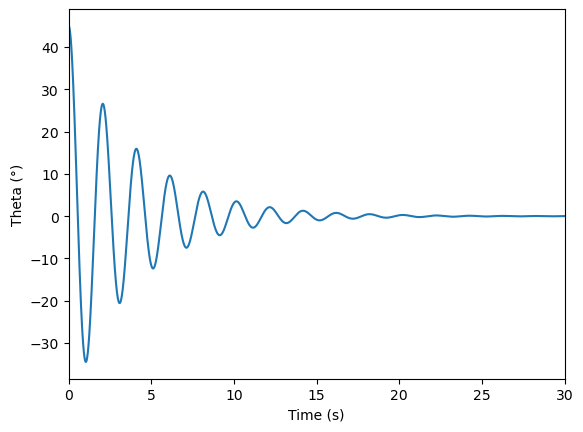

In [7]:
plt.figure()
plt.plot(t, np.degrees(theta))
plt.xlabel('Time (s)')
plt.ylabel('Theta (°)')
plt.xlim(0, 30)
plt.show()

The oscillations are now dying out exponentially due to the damping term, faster or slower depending on the $\beta$ parameter.

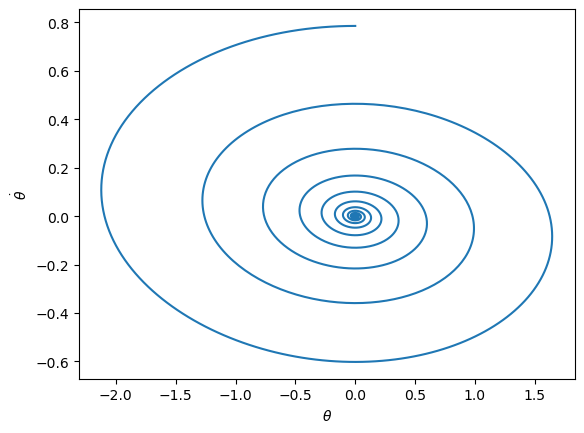

In [8]:
plt.figure()
plt.plot(ang_vel, theta)
plt.ylabel(r'$\dot{\theta}$')
plt.xlabel(r'$\theta$')
#plt.xlim(0, 30)
plt.show()

Due to the dissipative term, the phase plot collapses to a point (0,0) which is an **attractor** for the system.

## Driven Oscillator

We add a driving term:
\begin{equation}
    \ddot{\theta} = -\frac{g}{L} \text{sin}\theta - \beta \dot{\theta} + A \text{cos} \left(\omega t\right)
\end{equation}

In [9]:
def deriv_driv(t, y, g, L, beta, A, omega_0):
    '''
    Add a damping term
    '''
    return np.array([y[1], -g/L * np.sin(y[0]) - beta * y[1] + A * np.cos(omega_0*t)])

In [35]:
y2 = np.zeros([N,2])
y2[0][0] = np.radians(45)
#A = 1.5
A = 10
omega_0 = 0.9

In [36]:
rk4(t, deriv_driv, y2, dt, g=g, L=L, beta=beta, A = A, omega_0=omega_0)

In [37]:
theta2 = np.transpose(y2)[0]
ang_vel2 = np.transpose(y2)[1]

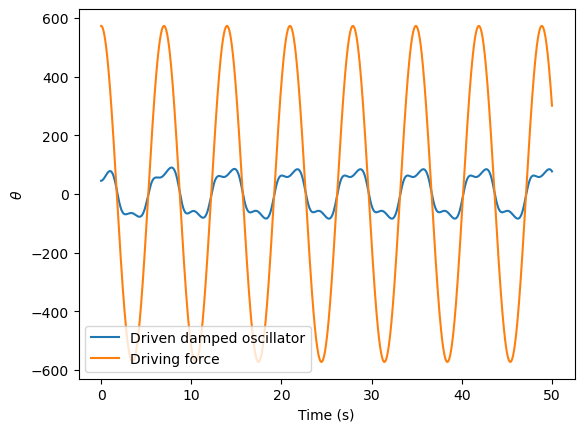

In [38]:
plt.figure()
plt.plot(t, np.degrees(theta2), label = 'Driven damped oscillator')
plt.plot(t, np.degrees(A*np.cos(omega_0*t)), label = 'Driving force')
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$')
plt.legend()
plt.savefig('driv_h_osc_high_a.jpg')
plt.show()

![driv_h_osc_low_a.jpg](./driv_h_osc_low_a.jpg)

In the first part of the plot we have a transient, i.e. the system responds to the initial conditions.

Later the system settles into a regular motion driven by the external driving force.

![driv_h_osc_high_a.jpg](./driv_h_osc_high_a.jpg)

For larger amplitudes of the forcing, the oscillations becomes non sinusoidal

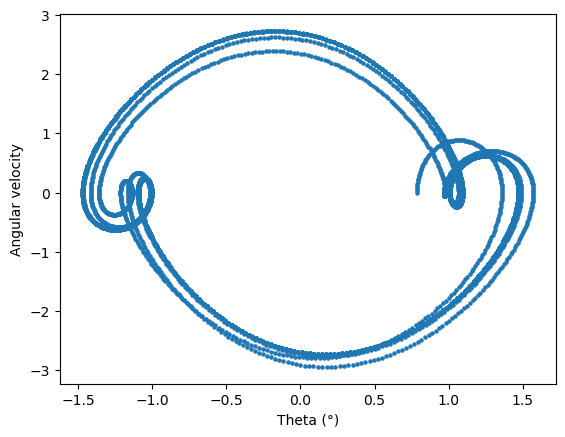

In [41]:
plt.figure()
#plot angular velocity vs 
plt.scatter(theta2, ang_vel2, s = 5)
plt.ylabel('Angular velocity')
plt.xlabel('Theta (°)')
#plt.savefig('omega_0=0.9.png')
plt.show()

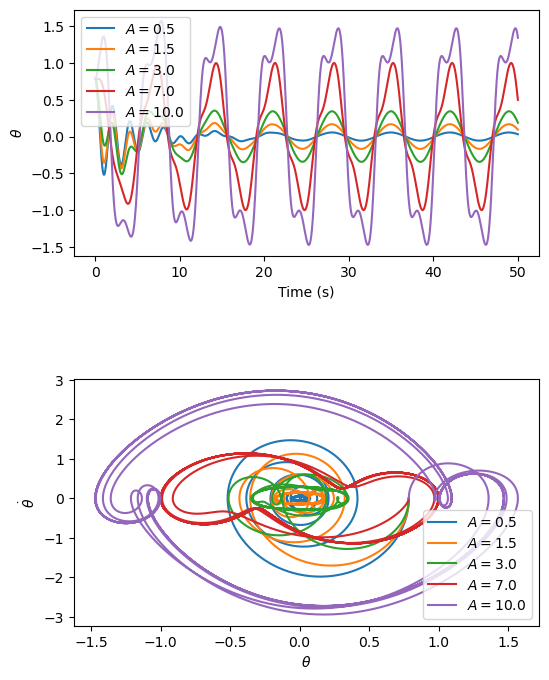

In [53]:
A_list = np.array([0.5, 1.5, 3, 7, 10])
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6, 8))
fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel(r'$\theta$')
ax2.set_ylabel(r'$\dot{\theta}$')
ax2.set_xlabel(r'$\theta$')
#ax1.plot(t, A*np.cos(omega_0*t), label = 'Driving force')
for A in A_list:
    rk4(t, deriv_driv, y2, dt, g=g, L=L, beta=beta, A = A, omega_0=omega_0)
    ax1.plot(t, np.transpose(y2)[0], label = '$A=$%s'% A)
    ax2.plot(np.transpose(y2)[0], np.transpose(y2)[1], label = '$A=$%s'% A)
ax1.legend()
ax2.legend()
plt.show()

For increasing values of the forcing, the system becomes chaotic: the phase plot appears dense and shows aperiodic clouds. For low amplitudes the attractor is a closed curve.

# Poincaré plots

In [67]:
omega = 0.9
T_poincare = 2*np.pi/omega
n = 5000
t_p = np.arange(T_poincare, n*T_poincare, T_poincare)

y3 = np.zeros([N,2])
y3[0][0] = np.radians(45)

In [74]:
rk4(t_p, deriv_driv, y3, T_poincare, g=g, L=L, beta=beta, A = 10, omega_0=omega_0)

/tmp/ipykernel_273/4012885062.py:6: RuntimeWarning: overflow encountered in multiply
  k4 = deriv( t[i], y[i][:] + k3, **kwargs) * dt
/tmp/ipykernel_273/4012885062.py:7: RuntimeWarning: overflow encountered in multiply
  y[i+1][:] = y[i][:] + (k1 + 2*k2 + 2*k3 + k4)/6
/tmp/ipykernel_273/4012885062.py:7: RuntimeWarning: invalid value encountered in add
  y[i+1][:] = y[i][:] + (k1 + 2*k2 + 2*k3 + k4)/6


In [72]:
theta3 = np.transpose(y3)[0]
ang_vel3 = np.transpose(y3)[1]

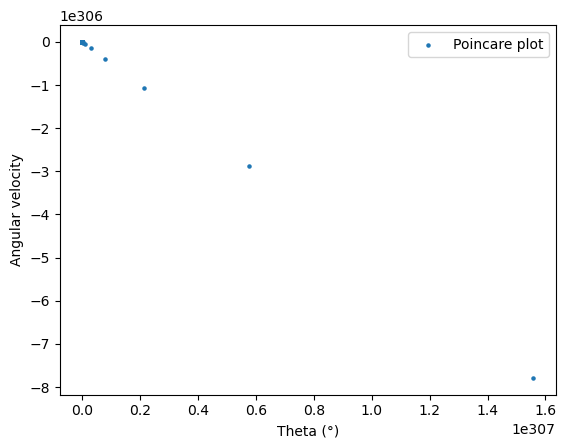

In [75]:
plt.figure()
#plot angular velocity vs 
plt.scatter(theta3, ang_vel3, s = 5, label = 'Poincare plot')
plt.ylabel('Angular velocity')
plt.xlabel('Theta (°)')
plt.legend()
#plt.savefig('omega_0=0.9.png')
plt.show()